In [2]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
All_season = pd.read_csv("Datasets/Serie-A/All_seasons")
# Title_secured = pd.read_excel("Datasets/Premier_League/premier_league_title_secured.xlsx")

In [4]:
All_season = All_season.loc[All_season['Season'] >= '2000-2001']

Lets answer the question - Is Serie-A Bundesliga
getting competitive

#### First of all, Lets understand how are we going to measure competitiveness of the league

#### Here are the few measure which will help understand and measure the competitiveness of the league
- Points distribution, Gap between the teams & Goal Difference distribution 
- How early the league title is decided?
- Number of different champions over time.
- Champions League & Relegation battle.


In [5]:
All_season.groupby(by=['Season']).agg(Team_count = ('Rk','last'))

,Team_count
Season,
2000-2001,18
2001-2002,18
2002-2003,18
2003-2004,18
2004-2005,20
2005-2006,20
2006-2007,20
2007-2008,20
2008-2009,20


#### 1. Points distribution, Gap between the teams & Goal Difference distribution 

In [7]:
rank_1 = All_season.loc[All_season['Rk'] == 1]
atleast_top_4 = All_season.loc[All_season['Rk'] == 4]
mid_table = All_season.loc[(All_season['Rk'] >= 7) & (All_season['Rk'] <= 13 )]
escape_relegation = All_season.loc[(All_season['Rk'] >= 14) & (All_season['Rk'] <=17 )]
relegated = All_season.loc[(All_season['Rk'] >= 18) & (All_season['Rk'] <=20 )]

In [8]:
rank_1 = rank_1.copy()
relegated = relegated.copy()
atleast_top_4 = atleast_top_4.copy()
mid_table = mid_table.copy()
escape_relegation = escape_relegation.copy()

rank_1.loc[:,'Pts_moving_avg'] = rank_1['Pts'].rolling(window=10).mean()
relegated.loc[:, 'Pts_moving_avg_'] = relegated['Pts'].rolling(window=10).mean()
atleast_top_4.loc[:, 'Pts_moving_avg_'] = atleast_top_4['Pts'].rolling(window=10).mean()
mid_table.loc[:, 'Pts_moving_avg_'] = mid_table['Pts'].rolling(window=10).mean()
escape_relegation.loc[:, 'Pts_moving_avg_'] = escape_relegation['Pts'].rolling(window=10).mean()

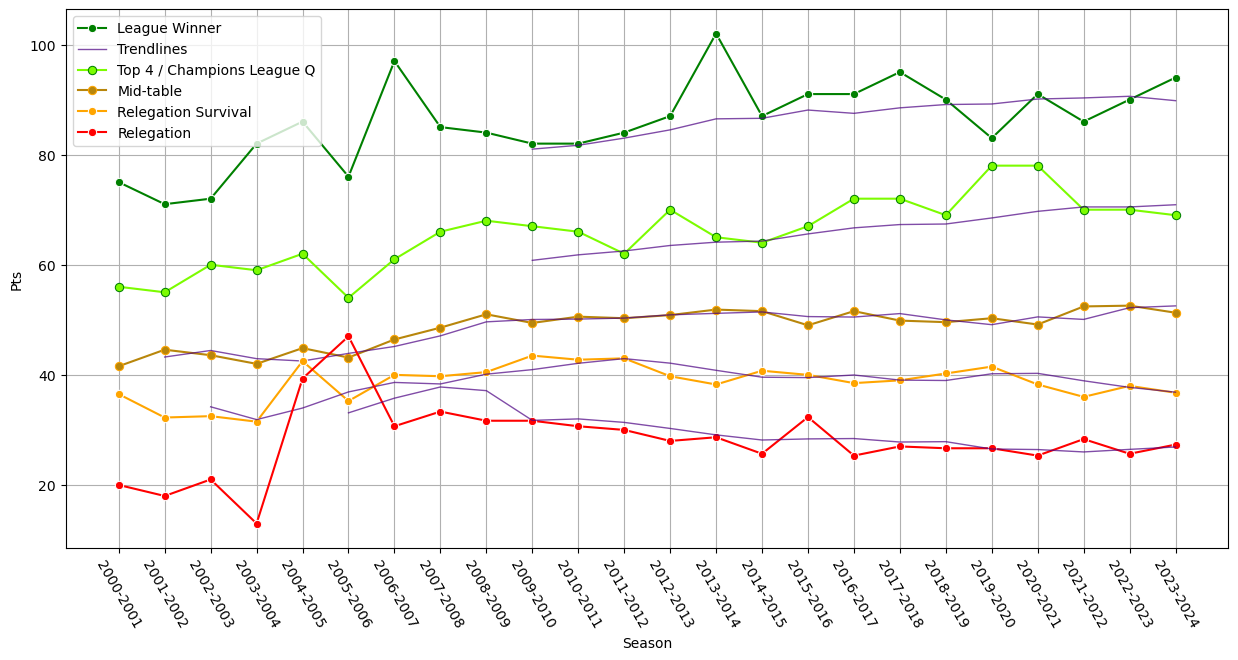

In [9]:
plt.figure(figsize=(15,7))
# Champion
sns.lineplot(data=rank_1,x='Season',y='Pts',c='g',marker="o",label= "League Winner")
sns.lineplot(data=rank_1,x='Season',y='Pts_moving_avg',c='indigo',linewidth=1,alpha=.7,label= "Trendlines") # Trendline
# Atlest top 4 or Champions league position.
sns.lineplot(data=atleast_top_4,x='Season',y='Pts',c='lawngreen',marker="o",ms = 6, mec = 'g',label= "Top 4 / Champions League Q")
sns.lineplot(data=atleast_top_4,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7) # Trendline
# Mid- Table clubs
sns.lineplot(data=mid_table,x='Season',y='Pts',c='darkgoldenrod',marker="o",errorbar=None,ms = 6, mec = 'orange',label= "Mid-table")
sns.lineplot(data=mid_table,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7,errorbar=None) # Trendline.
# # Escape_relegation
sns.lineplot(data=escape_relegation,x='Season',y='Pts',c='orange',marker="o",errorbar=None,label= "Relegation Survival")
sns.lineplot(data=escape_relegation,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7,errorbar=None) # Trendline
# Relegated 
sns.lineplot(data=relegated,x='Season',y='Pts',c='r',marker="o",errorbar=None,label= "Relegation")
sns.lineplot(data=relegated,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7,errorbar=None) # Trendline

plt.legend()
plt.grid()
x,y = plt.xticks(rotation=300)

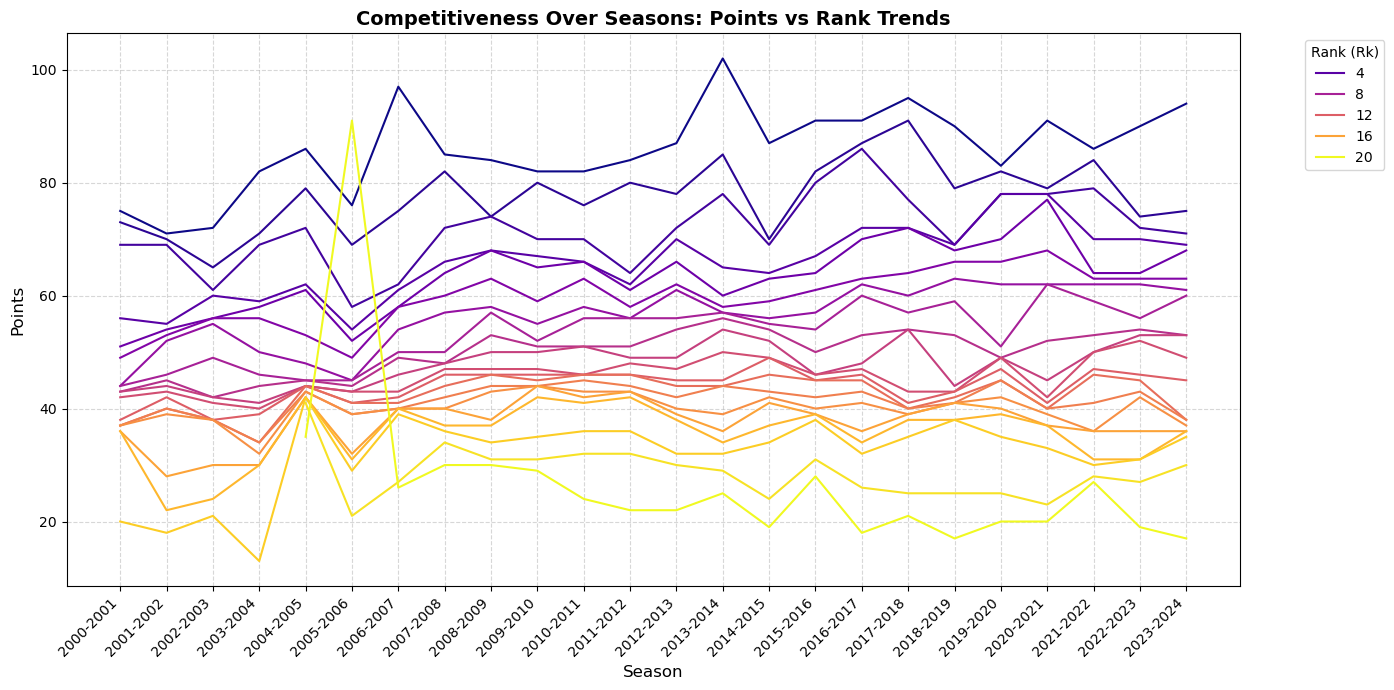

In [10]:
plt.figure(figsize=(14, 7))

# Improved colormap and better color control
sns.lineplot(
    data=All_season, 
    x='Season', 
    y='Pts', 
    hue='Rk', 
    palette='plasma',  
    alpha=1,        # Transparency to reduce overlap clutter
    linewidth=1.5     # Thicker lines for clarity
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add title and labels
plt.xlabel('Season', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.title('Competitiveness Over Seasons: Points vs Rank Trends', fontsize=14, fontweight='bold')

# Show legend outside the plot to avoid clutter
plt.legend(title="Rank (Rk)", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid label overlap
plt.tight_layout()

plt.show()

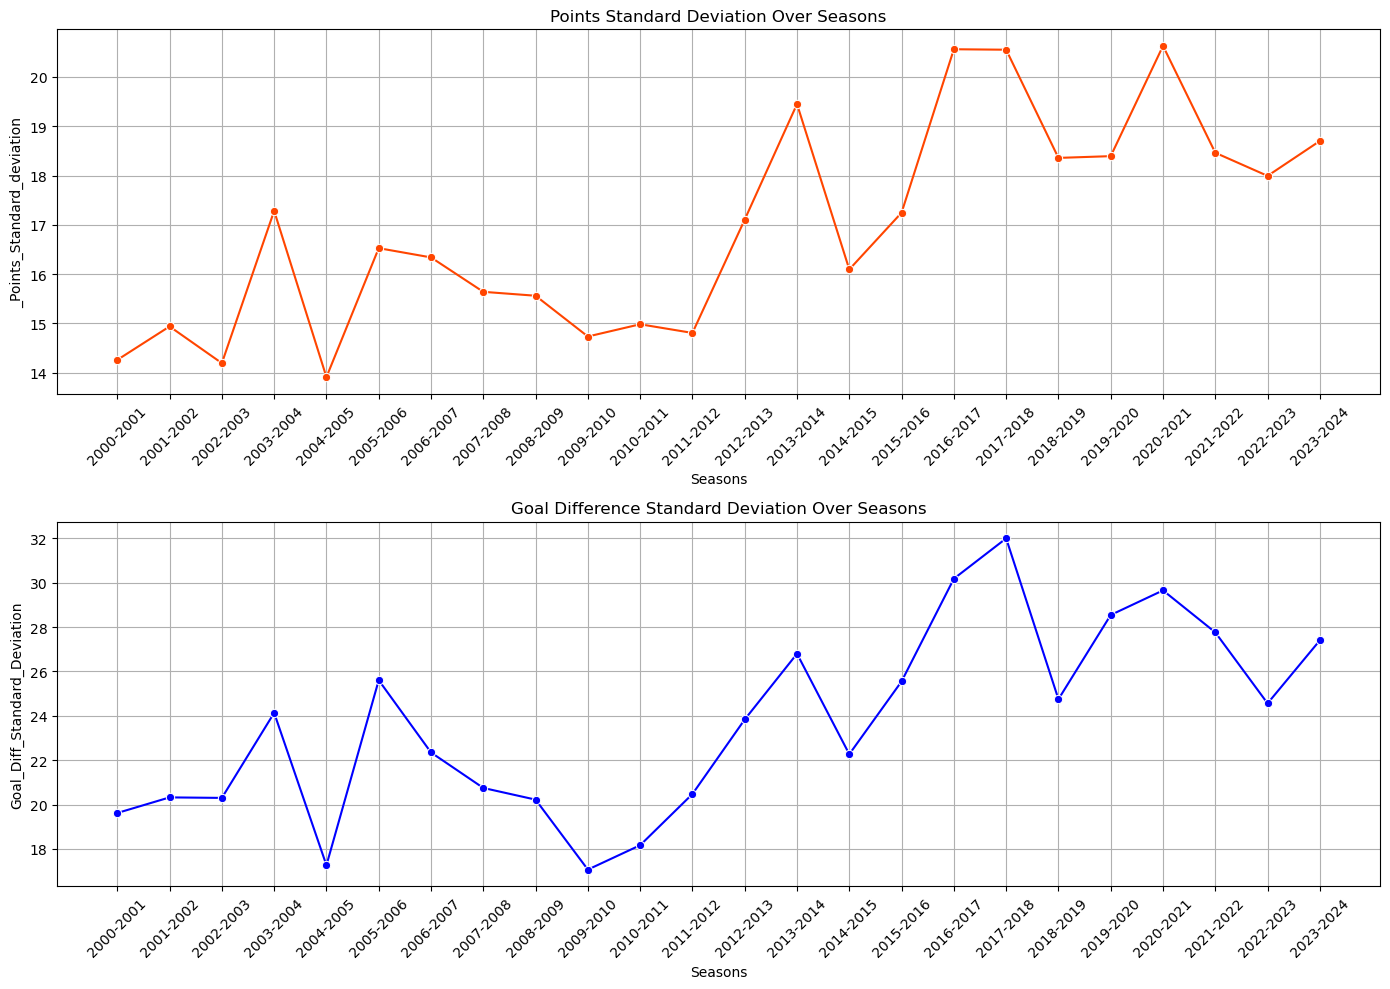

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
axes[0].grid(True)

competitive = All_season.groupby(by='Season')['Pts'].std().reset_index()
competitive.columns = ['Seasons','_Points_Standard_deviation']
sns.lineplot(ax=axes[0],data=competitive,y='_Points_Standard_deviation',x='Seasons',c='orangered',marker = "o")
axes[0].set_xticks(range(len(competitive['Seasons'])))  # Set tick positions
axes[0].set_xticklabels(competitive['Seasons'], rotation=45)  # Set tick labels
axes[0].set_title('Points Standard Deviation Over Seasons')
axes[0].grid(True)


# Goal difference standard deviation
goal_diff = All_season.groupby(by='Season')['GD'].std().reset_index()
goal_diff.columns = ['Seasons', 'Goal_Diff_Standard_Deviation']
sns.lineplot(ax=axes[1], data=goal_diff, y='Goal_Diff_Standard_Deviation', x='Seasons',c='blue',marker = "o")
axes[1].set_xticks(range(len(goal_diff['Seasons'])))  # Set tick positions
axes[1].set_xticklabels(goal_diff['Seasons'], rotation=45)  # Set tick labels
axes[1].set_title('Goal Difference Standard Deviation Over Seasons')
axes[1].grid(True)


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [12]:
All_season.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes', 'Season',
       'Goals scored by top team scorer', 'Promoted',
       'Years_in_League_after_promotion', 'Same_Rank_As_Last_Season'],
      dtype='object')

In [13]:
Competitive_index = All_season.groupby(by=['Season']).agg(Champion = ('Squad','first')).reset_index()
Competitive_index.columns = ['Seasons','Champion']

In [14]:
competitive.head()

,Seasons,_Points_Standard_deviation
0,2000-2001,14.261791
1,2001-2002,14.940076
2,2002-2003,14.195645
3,2003-2004,17.283110
4,2004-2005,13.912792


In [15]:
goal_diff.head()

,Seasons,Goal_Diff_Standard_Deviation
0,2000-2001,19.616919
1,2001-2002,20.320954
2,2002-2003,20.297783
3,2003-2004,24.134427
4,2004-2005,17.259627


In [16]:
Competitive_index = Competitive_index.merge(competitive,on="Seasons",how="left")

In [17]:
Competitive_index = Competitive_index.merge(goal_diff,on="Seasons",how="left")

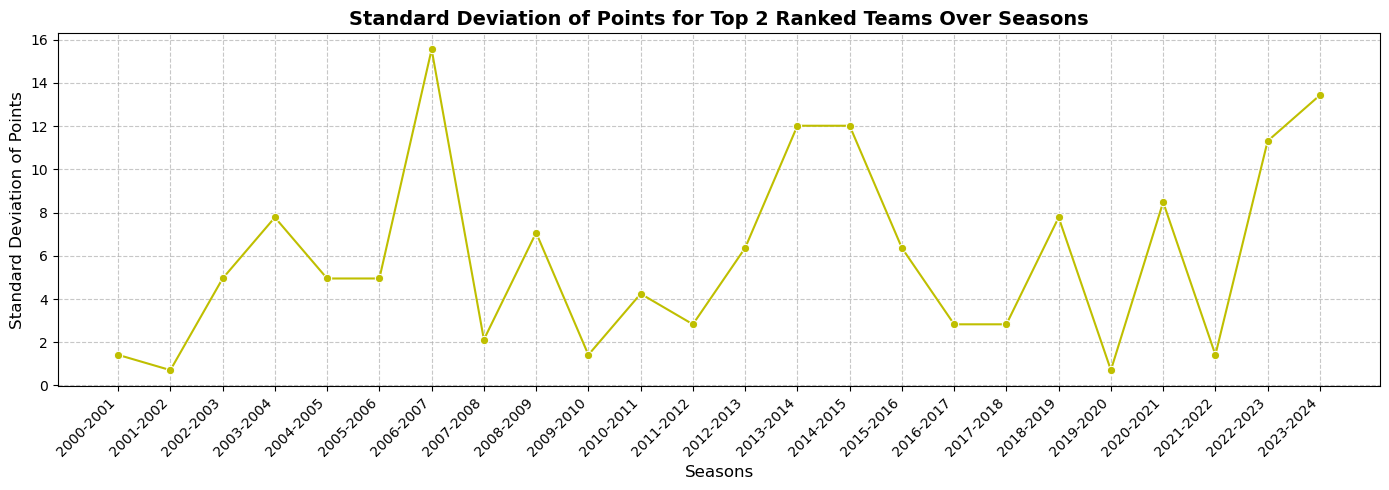

In [18]:
# Set figure size
plt.figure(figsize=(14, 5))

# Filter top 2 ranked teams
top_2_comp = All_season.loc[All_season['Rk'] <= 2]
top_2_comp = top_2_comp.groupby(by='Season')['Pts'].std().reset_index()
top_2_comp.columns = ['Seasons', 'Ttitle_race_Points_Standard_deviation']

# Create line plot with markers and styling
sns.lineplot(data=top_2_comp, x='Seasons', y='Ttitle_race_Points_Standard_deviation', marker='o', linestyle='-', color='y')

plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.xticks(range(len(top_2_comp['Seasons'])), top_2_comp['Seasons']) 

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Standard Deviation of Points', fontsize=12)
plt.title('Standard Deviation of Points for Top 2 Ranked Teams Over Seasons', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
top_2_comp.head()

,Seasons,Ttitle_race_Points_Standard_deviation
0,2000-2001,1.414214
1,2001-2002,0.707107
2,2002-2003,4.949747
3,2003-2004,7.778175
4,2004-2005,4.949747


In [20]:
Competitive_index = Competitive_index.merge(top_2_comp,on="Seasons",how="left")

In [21]:
Competitive_index

,Seasons,Champion,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation
0,2000-2001,Roma,14.261791,19.616919,1.414214
1,2001-2002,Juventus,14.940076,20.320954,0.707107
2,2002-2003,Juventus,14.195645,20.297783,4.949747
3,2003-2004,Milan,17.283110,24.134427,7.778175
4,2004-2005,Juventus,13.912792,17.259627,4.949747
5,2005-2006,Inter,16.527171,25.606331,4.949747
6,2006-2007,Inter,16.339813,22.346553,15.556349
7,2007-2008,Inter,15.642049,20.746591,2.121320
8,2008-2009,Inter,15.562692,20.219844,7.071068
9,2009-2010,Inter,14.735921,17.063349,1.414214


#### 2. How early the league title is decided?

In [20]:
Title_secured.head()

,Season,Champion,Matchday Title Secured,Notable Details
0,1992-1993,Manchester United,41,Secured the title with a 2–1 win over Crystal ...
1,1993-1994,Manchester United,42,Clinched the title with a 2–1 victory against ...
2,1994-1995,Blackburn Rovers,42,"Despite a 2–1 loss to Liverpool, they won the ..."
3,1995-1996,Manchester United,38,"Won 3–0 against Middlesbrough, securing the ti..."
4,1996-1997,Manchester United,37,Clinched the title with a 3–1 win over Middles...


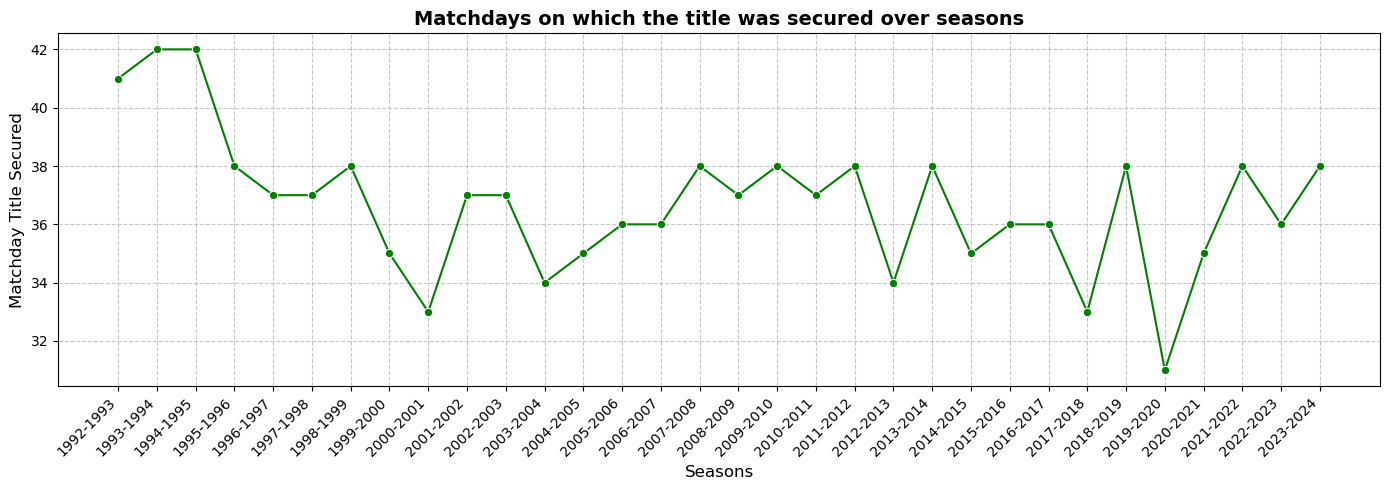

In [21]:
plt.figure(figsize=(14, 5))

sns.lineplot(data=Title_secured,x="Season",y="Matchday Title Secured", marker='o', linestyle='-', color='g')
plt.xticks(rotation=45, ha='right')  # Rotate for better readability

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Matchday Title Secured', fontsize=12)
plt.title('Matchdays on which the title was secured over seasons', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

#### 3. Number of different champions over time.

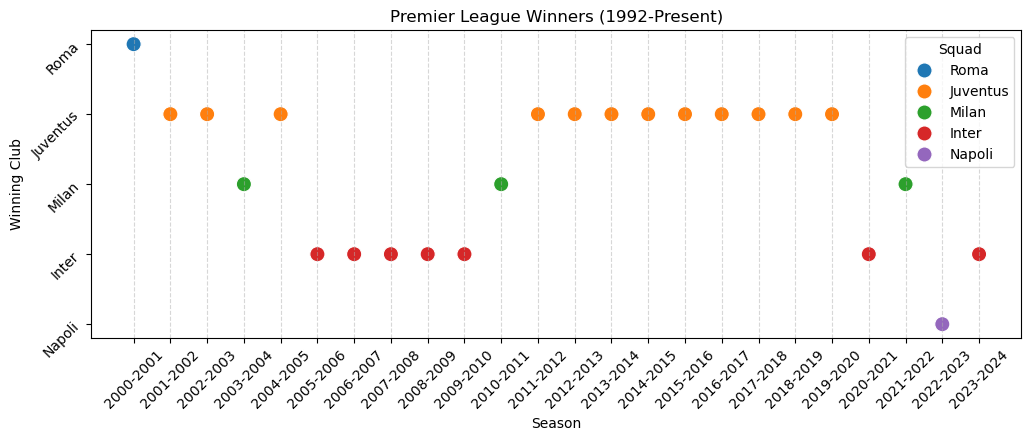

In [22]:
rank_1[['Squad','Season']]
plt.figure(figsize=(12,4))
sns.scatterplot(data=rank_1 ,x= 'Season',y='Squad',marker = "o",hue="Squad",s= 120)
plt.xlabel("Season")
plt.ylabel("Winning Club")
plt.title("Premier League Winners (1992-Present)")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [23]:
Competitive_index.head()

,Seasons,Champion,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation
0,2000-2001,Roma,14.261791,19.616919,1.414214
1,2001-2002,Juventus,14.940076,20.320954,0.707107
2,2002-2003,Juventus,14.195645,20.297783,4.949747
3,2003-2004,Milan,17.283110,24.134427,7.778175
4,2004-2005,Juventus,13.912792,17.259627,4.949747


In [24]:
Competitive_index['Year'] = list(range(2000, 2024))

In [25]:
Competitive_index['Unique_Champions_Last_5'] = Competitive_index.apply(
    lambda row: Competitive_index[(Competitive_index['Year'] >= row['Year'] - 4) & (Competitive_index['Year'] <= row['Year'])]['Champion'].nunique(),
    axis=1
)

Competitive_index

,Seasons,Champion,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation,Year,Unique_Champions_Last_5
0,2000-2001,Roma,14.261791,19.616919,1.414214,2000,1
1,2001-2002,Juventus,14.940076,20.320954,0.707107,2001,2
2,2002-2003,Juventus,14.195645,20.297783,4.949747,2002,2
3,2003-2004,Milan,17.283110,24.134427,7.778175,2003,3
4,2004-2005,Juventus,13.912792,17.259627,4.949747,2004,3
5,2005-2006,Inter,16.527171,25.606331,4.949747,2005,3
6,2006-2007,Inter,16.339813,22.346553,15.556349,2006,3
7,2007-2008,Inter,15.642049,20.746591,2.121320,2007,3
8,2008-2009,Inter,15.562692,20.219844,7.071068,2008,2
9,2009-2010,Inter,14.735921,17.063349,1.414214,2009,1


#### 4. Champions League & Relegation battle.

In [26]:
Champion_league_battle = All_season.loc[All_season['Rk'] < 7]
Relegation_battles = All_season.loc[All_season['Rk'] > 14]

In [27]:
Champion_league_battle_std = Champion_league_battle.groupby(by='Season')['Pts'].std().reset_index()
Champion_league_battle_std.columns = ['Seasons', 'UCL_race_Points_Standard_deviation']
Champion_league_battle_std.head()

,Seasons,UCL_race_Points_Standard_deviation
0,2000-2001,11.531117
1,2001-2002,8.809086
2,2002-2003,6.088240
3,2003-2004,10.028293
4,2004-2005,12.384130


In [28]:
Relegation_battles_std = Relegation_battles.groupby(by='Season')['Pts'].std().reset_index()
Relegation_battles_std.columns = ['Seasons', 'Relegation_battle_Points_Standard_deviation']
Relegation_battles_std.head()

,Seasons,Relegation_battle_Points_Standard_deviation
0,2000-2001,8.180261
1,2001-2002,9.142392
2,2002-2003,7.500000
3,2003-2004,8.883505
4,2004-2005,2.926887


In [29]:
All_season.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes', 'Season',
       'Goals scored by top team scorer', 'Promoted',
       'Years_in_League_after_promotion', 'Same_Rank_As_Last_Season'],
      dtype='object')

In [30]:
Competitive_index = Competitive_index.merge(Champion_league_battle_std,on="Seasons",how="left")

In [31]:
Competitive_index = Competitive_index.merge(Relegation_battles_std,on="Seasons",how="left")

#### 4. Teams with Same  Rank As Last Season

In [32]:
Same_Rank_As_Last_Season = All_season.groupby(by='Season')['Same_Rank_As_Last_Season'].sum().reset_index()
Same_Rank_As_Last_Season.columns = ['Seasons', 'Same_Rank_As_Last_Season']
Same_Rank_As_Last_Season

,Seasons,Same_Rank_As_Last_Season
0,2000-2001,2
1,2001-2002,0
2,2002-2003,1
3,2003-2004,1
4,2004-2005,1
5,2005-2006,0
6,2006-2007,4
7,2007-2008,2
8,2008-2009,3
9,2009-2010,3


In [33]:
Competitive_index = Competitive_index.merge(Same_Rank_As_Last_Season,on="Seasons",how="left")

In [34]:
Competitive_index

,Seasons,Champion,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation,Year,Unique_Champions_Last_5,UCL_race_Points_Standard_deviation,Relegation_battle_Points_Standard_deviation,Same_Rank_As_Last_Season
0,2000-2001,Roma,14.261791,19.616919,1.414214,2000,1,11.531117,8.180261,2
1,2001-2002,Juventus,14.940076,20.320954,0.707107,2001,2,8.809086,9.142392,0
2,2002-2003,Juventus,14.195645,20.297783,4.949747,2002,2,6.088240,7.500000,1
3,2003-2004,Milan,17.283110,24.134427,7.778175,2003,3,10.028293,8.883505,1
4,2004-2005,Juventus,13.912792,17.259627,4.949747,2004,3,12.384130,2.926887,1
5,2005-2006,Inter,16.527171,25.606331,4.949747,2005,3,10.595597,25.406692,0
6,2006-2007,Inter,16.339813,22.346553,15.556349,2006,3,15.319922,6.860515,4
7,2007-2008,Inter,15.642049,20.746591,2.121320,2007,3,10.114346,3.816630,2
8,2008-2009,Inter,15.562692,20.219844,7.071068,2008,2,7.277820,4.847680,3
9,2009-2010,Inter,14.735921,17.063349,1.414214,2009,1,8.916277,6.715653,3


In [35]:
np.array(Competitive_index['Goal_Diff_Standard_Deviation'])

array([19.61691947, 20.32095412, 20.29778313, 24.13442745, 17.25962737,
       25.60633145, 22.34655278, 20.74659135, 20.21984434, 17.06334946,
       18.16300462, 20.47334596, 23.83495885, 26.80141395, 22.2686941 ,
       25.55283484, 30.18539208, 32.0032893 , 24.749269  , 28.54912663,
       29.65769626, 27.76404339, 24.56141604, 27.40533947])

In [36]:
def MinMax_Scaling(feature):
    feat = np.array(feature)
    min_,max_ = np.min(feat),np.max(feat)
    scaling = (feat- min_)/(max_- min_)
    return scaling

In [37]:
Competitive_index_scaled = Competitive_index[['Seasons','Champion']]

In [38]:
# Step 1: Ensure you're working on a proper copy
Competitive_index_scaled = Competitive_index.copy()

# Step 2: Assign scaled values safely using .loc
# Competitive_index_scaled.loc[:, 'Matchday Title Secured'] = MinMax_Scaling(Competitive_index['Matchday Title Secured'])
Competitive_index_scaled.loc[:, '_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Goal_Diff_Standard_Deviation'] = MinMax_Scaling(Competitive_index['Goal_Diff_Standard_Deviation'])
Competitive_index_scaled.loc[:, 'Ttitle_race_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['Ttitle_race_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Unique_Champions_Last_5'] = MinMax_Scaling(Competitive_index['Unique_Champions_Last_5'])
Competitive_index_scaled.loc[:, 'UCL_race_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['UCL_race_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Relegation_battle_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['Relegation_battle_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Same_Rank_As_Last_Season'] = MinMax_Scaling(Competitive_index['Same_Rank_As_Last_Season'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8740\3395482283.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.33333333 0.33333333 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.33333333 0.         0.33333333 0.66666667
 0.66666667 0.66666667 0.33333333 0.         0.         0.
 0.         0.         0.33333333 0.66666667 1.         1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Competitive_index_scaled.loc[:, 'Unique_Champions_Last_5'] = MinMax_Scaling(Competitive_index['Unique_Champions_Last_5'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8740\3395482283.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.28571429 0.         0.14285714 0.14285714 0.14285714 0.
 0.57142857 0.28571429 0.42857143 0.42857143 0.28571429 0.
 0.28571429 0.28571429 0.42857143 0.1428

In [39]:
Competitive_index_scaled

,Seasons,Champion,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation,Year,Unique_Champions_Last_5,UCL_race_Points_Standard_deviation,Relegation_battle_Points_Standard_deviation,Same_Rank_As_Last_Season
0,2000-2001,Roma,0.051967,0.170922,0.047619,2000,0.000000,0.497113,0.233693,0.285714
1,2001-2002,Juventus,0.152966,0.218047,0.000000,2001,0.333333,0.248502,0.276493,0.000000
2,2002-2003,Juventus,0.042118,0.216496,0.285714,2002,0.333333,0.000000,0.203432,0.142857
3,2003-2004,Milan,0.501853,0.473300,0.476190,2003,0.666667,0.359856,0.264976,0.142857
4,2004-2005,Juventus,0.000000,0.013138,0.285714,2004,0.666667,0.575021,0.000000,0.142857
5,2005-2006,Inter,0.389290,0.571822,0.285714,2005,0.666667,0.411669,1.000000,0.000000
6,2006-2007,Inter,0.361392,0.353629,1.000000,2006,0.666667,0.843155,0.174985,0.571429
7,2007-2008,Inter,0.257493,0.246537,0.095238,2007,0.666667,0.367715,0.039580,0.285714
8,2008-2009,Inter,0.245676,0.211279,0.428571,2008,0.333333,0.108648,0.085445,0.428571
9,2009-2010,Inter,0.122567,0.000000,0.047619,2009,0.000000,0.258292,0.168541,0.428571


In [40]:
# Define weights for each feature
weights = {
    # 'Matchday Title Secured': 0.125,
    '_Points_Standard_deviation': 0.125,
    'Goal_Diff_Standard_Deviation': 0.125,
    'Ttitle_race_Points_Standard_deviation': 0.125,
    'Unique_Champions_Last_5': 0.125,
    'UCL_race_Points_Standard_deviation': 0.125,
    'Relegation_battle_Points_Standard_deviation': 0.125,
    'Same_Rank_As_Last_Season': 0.125
}

# Multiply each column by its corresponding weight and sum to get Competitive_Index
Competitive_index_scaled['Competitive_Index'] = (
    # Competitive_index_scaled['Matchday Title Secured'] * weights['Matchday Title Secured'] +
   (1 - Competitive_index_scaled['_Points_Standard_deviation']) * weights['_Points_Standard_deviation'] +
   (1 - Competitive_index_scaled['Goal_Diff_Standard_Deviation']) * weights['Goal_Diff_Standard_Deviation'] +
    (1- Competitive_index_scaled['Ttitle_race_Points_Standard_deviation']) * weights['Ttitle_race_Points_Standard_deviation'] +
    Competitive_index_scaled['Unique_Champions_Last_5'] * weights['Unique_Champions_Last_5'] +
    (1- Competitive_index_scaled['UCL_race_Points_Standard_deviation']) * weights['UCL_race_Points_Standard_deviation'] +
    (1- Competitive_index_scaled['Relegation_battle_Points_Standard_deviation']) * weights['Relegation_battle_Points_Standard_deviation'] +
    Competitive_index_scaled['Same_Rank_As_Last_Season'] * weights['Same_Rank_As_Last_Season']
    
)


In [41]:
final_table = Competitive_index_scaled[['Seasons','Champion','Competitive_Index']]
final_table

,Seasons,Champion,Competitive_Index
0,2000-2001,Roma,0.535550
1,2001-2002,Juventus,0.554666
2,2002-2003,Juventus,0.591054
3,2003-2004,Milan,0.466669
4,2004-2005,Juventus,0.616956
5,2005-2006,Inter,0.376021
6,2006-2007,Inter,0.438117
7,2007-2008,Inter,0.618227
8,2008-2009,Inter,0.585286
9,2009-2010,Inter,0.603944


In [42]:
final_table['Competitive_Index_trend'] = final_table['Competitive_Index'].rolling(window=5).mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8740\3880509263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table['Competitive_Index_trend'] = final_table['Competitive_Index'].rolling(window=5).mean()


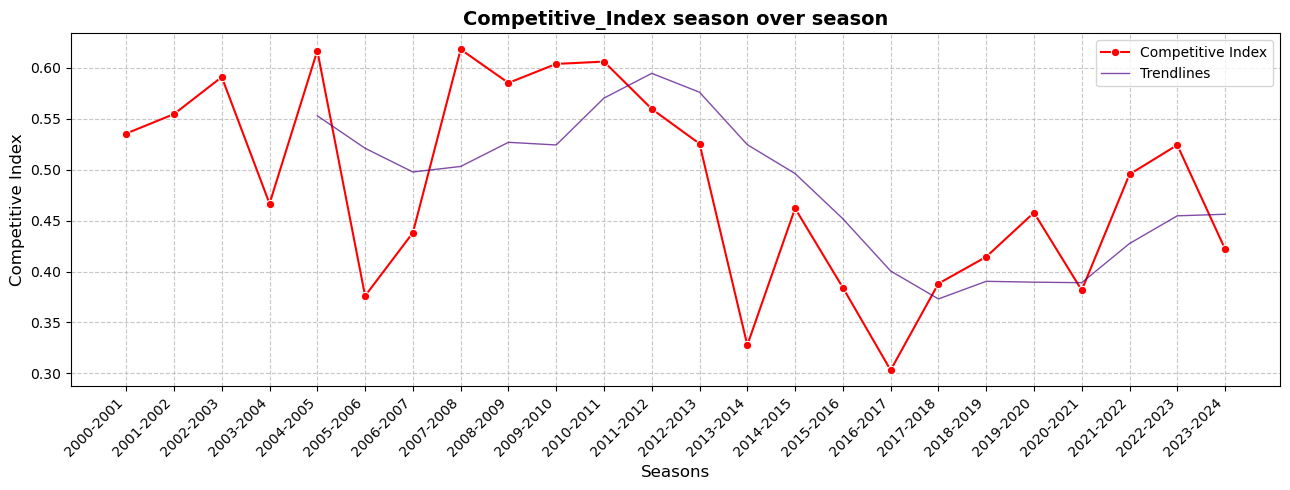

In [43]:

plt.figure(figsize=(13, 5))

sns.lineplot(data=final_table,x="Seasons",y="Competitive_Index", marker='o', linestyle='-', color='r',label= "Competitive Index")
sns.lineplot(data=final_table,x='Seasons',y='Competitive_Index_trend',c='indigo',linewidth=1,alpha=.7,label= "Trendlines") # Trendline

plt.xticks(rotation=45, ha='right')  # Rotate for better readability

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Competitive Index', fontsize=12)
plt.title('Competitive_Index season over season', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()